# Анализ рынка заведений общественного питания Москвы

## Описание проекта  
Инвестидея - открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Для инвесторов необходимо проанализировать ситуацию на рынке заведений общественного питания Москвы.  
 
 ____
 **Цель проекта:**
Дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

____
 **Исходные данные:** 
   
 Есть открытые данные о заведениях общественного питания в Москве. 

# Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = 12,6
plt.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings("ignore")

In [2]:
rest = pd.read_csv('/datasets/rest_data.csv') 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [3]:
rest.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


## Описание данных  
Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Тип данных в каждой колонке соответствует описанию. В колонке chain возможно использовать логический тип, но в нашем случае не принципиально. Пропущенные значения отсутствуют.

## Подготовка данных

### Обработка дубликатов

In [5]:
rest.duplicated().sum()

0

Проверим есть ли дубликаты по столбцам название заведения и адрес.

In [6]:
rest[rest.duplicated(subset=['object_name', 'address'])].head(10)

,id,object_name,chain,object_type,address,number
114,28613,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
579,149227,Общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
1648,151871,Ресторан «Практика By Darvin»,нет,кафе,"город Москва, Большая Грузинская улица, дом 37, строение 2",50
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",150
2376,28605,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,кафетерий,"город Москва, 2-я Бауманская улица, дом 5, строение 1",35
2377,28606,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, строение 1",16


In [7]:
rest.query('object_name == "Ресторан «Практика By Darvin»"')

,id,object_name,chain,object_type,address,number
1647,151866,Ресторан «Практика By Darvin»,нет,бар,"город Москва, Большая Грузинская улица, дом 37, строение 2",45
1648,151871,Ресторан «Практика By Darvin»,нет,кафе,"город Москва, Большая Грузинская улица, дом 37, строение 2",50


Не похоже на дубликат. Скорее всего два разных заведения одной компании могут быть расположены по одному адресу.

In [8]:
rest.chain.value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

Проверим есть ли дубликаты в столбце тип объекта.

In [9]:
rest.object_type.value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Также у нас есть названия заведений они могут быть внесены с ошибками, не единообразно с разным регистром, русские/латинские названия. В целом для исследования нам это не понадобиться, кроме случая когда потребуется выявить сетевые заведения. При анализе данного вопроса нам будет необходдимо привести все названия заведений к единому стилю, чтобы объединить заведения с одним названием в одну сеть.

Посмотрим на численные столбцы.

In [10]:
rest.describe()

,id,number
count,15366.00,15366.00
mean,119720.07,59.55
std,73036.13,74.74
min,838.00,0.00
25%,28524.00,12.00
50%,144974.50,40.00
75%,184262.25,80.00
max,223439.00,1700.00


Отрицательных значений нет, в данном случае так и должно быть, вместительность не может быть отрицательной. Идентификатор объекта должно быть целым и положительным.  
Достаточно большое максимальное число посадочных мест. Посмотрим подробнее.

In [11]:
rest.query('number == 1700')

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700


Действительно есть такое заведение с большим Банкетным залом.

In [12]:
%config InlineBackend.figure_format = 'retina'

# Анализ данных

## Исследуем соотношение видов объектов общественного питания по количеству заведений. Построим график.

In [13]:
object_count = rest.object_type.value_counts().reset_index().rename(columns={"index": "type", "object_type": "count"})

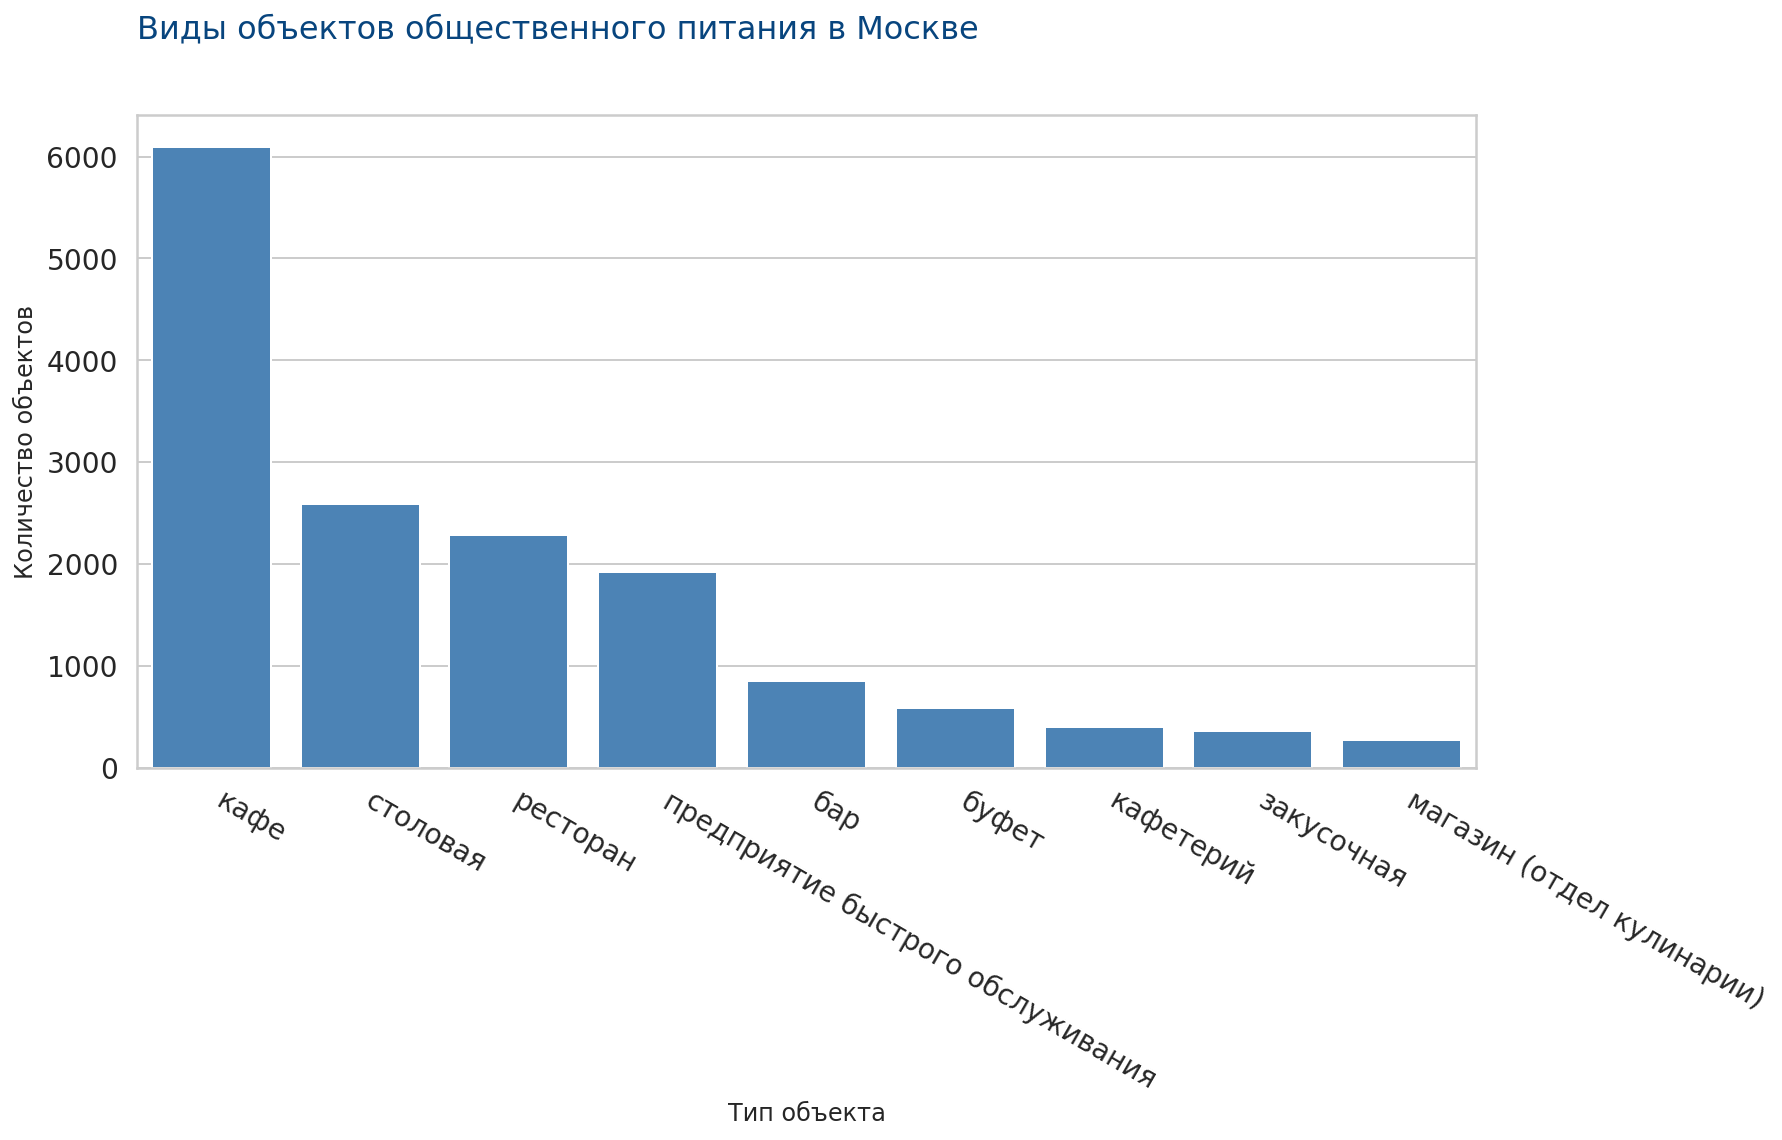

In [14]:
sns.barplot(x='type', y='count', data=object_count, color='#3a84c7') 
plt.xlabel("Тип объекта")
plt.ylabel("Количество объектов")
plt.yticks(fontsize=14)
plt.xticks(rotation=-30, horizontalalignment='left',fontsize=14)
plt.title('Виды объектов общественного питания в Москве', color="#08457E", fontsize=16, loc='left', y=1.1);

Как мы видим в Москве популярны кафе. Менее популярны столовые и рестораны.

## Исследуем соотношение сетевых и несетевых заведений по количеству.

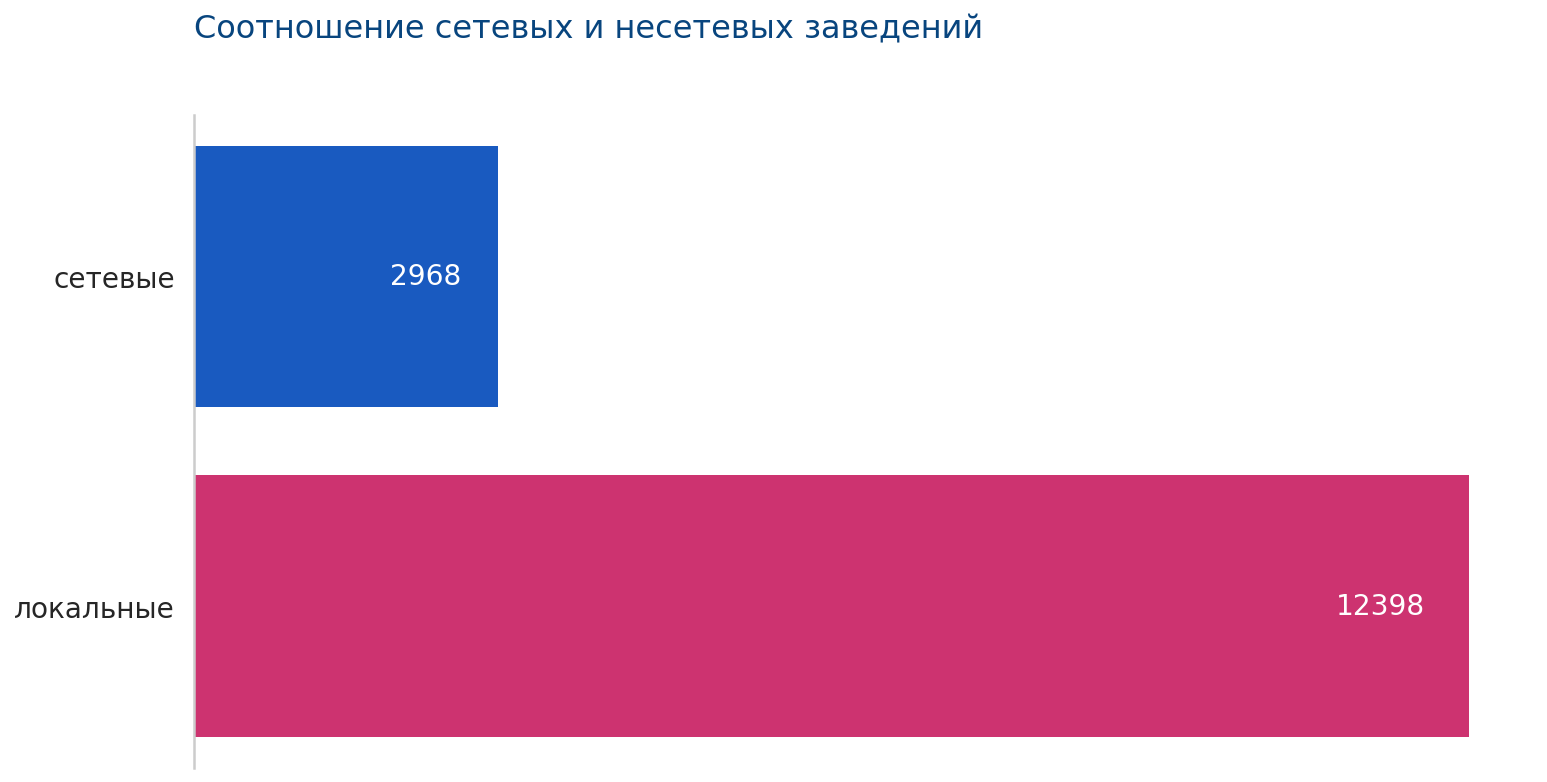

In [15]:
chain_count = rest.chain.value_counts().reset_index() 
plt.barh(['локальные', 'сетевые'], chain_count['chain'], color=['#CD3370','#195AC0']) 
plt.text(y='локальные',x=11100,s=chain_count.loc[0,'chain'], fontsize=14, color='white', verticalalignment='center')
plt.text(y='сетевые',x=1900,s=chain_count.loc[1,'chain'], fontsize=14, color='white', verticalalignment='center')
sns.despine(bottom=True)
plt.xticks([])
plt.yticks(fontsize=14)
plt.grid(color='white')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Cоотношение сетевых и несетевых заведений', color="#08457E", fontsize=16, loc='left', y=1.1)
plt.show()

Посмотрим для какого вида объекта общественного питания характерно сетевое распространение.

In [16]:
chain_object = rest.pivot_table(index=['object_type','chain'], values='id',aggfunc='count') \
.reset_index().rename(columns={"id": "count"}).sort_values(by='count', ascending=False)
chain_object

,object_type,chain,count
7,кафе,нет,4703
17,столовая,нет,2584
15,ресторан,нет,1741
6,кафе,да,1396
13,предприятие быстрого обслуживания,нет,1132
1,бар,нет,819
12,предприятие быстрого обслуживания,да,791
3,буфет,нет,574
14,ресторан,да,544
9,кафетерий,нет,346


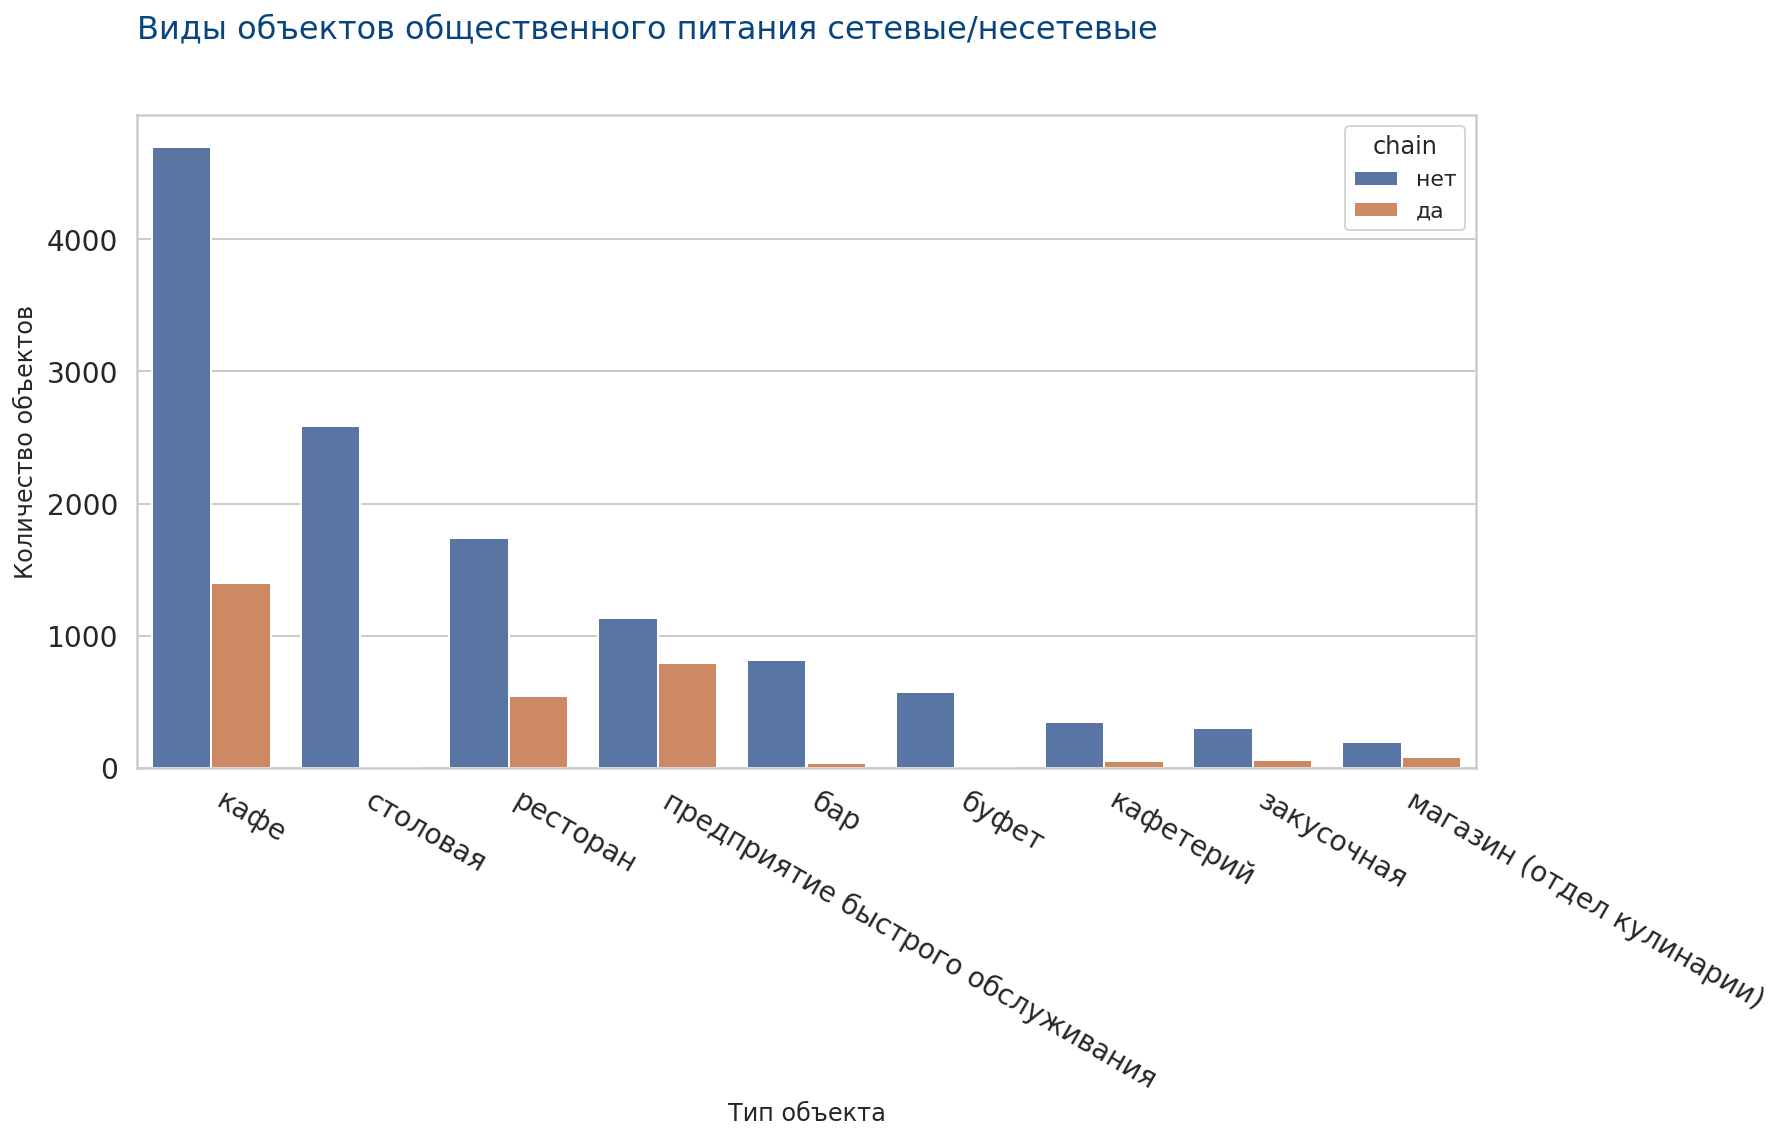

In [17]:
sns.barplot(x='object_type', y='count', data=chain_object, hue='chain') #color="#08457E")
plt.xlabel("Тип объекта")
plt.ylabel("Количество объектов")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=-30, horizontalalignment='left')
plt.title('Виды объектов общественного питания сетевые/несетевые', color="#08457E", fontsize=16, loc='left', y=1.1);

Сетевые заведения это как правило кафе, предприятия быстрого обслуживания и рестораны.

In [18]:
chain_object_ratio = rest.pivot_table(index='object_type', columns='chain', values='id',aggfunc='count') \
.reset_index()
chain_object_ratio['ratio'] = chain_object_ratio['да'] / (chain_object_ratio['нет']+chain_object_ratio['да'])
chain_object_ratio.sort_values(by='ratio', ascending=False)

chain,object_type,да,нет,ratio
6,предприятие быстрого обслуживания,791,1132,0.41
5,магазин (отдел кулинарии),78,195,0.29
7,ресторан,544,1741,0.24
3,кафе,1396,4703,0.23
2,закусочная,56,304,0.16
4,кафетерий,52,346,0.13
0,бар,37,819,0.04
1,буфет,11,574,0.02
8,столовая,3,2584,0.00


А среди всех объектов именно для предприятий быстрого обслуживания более характерно сетевое распространение.

## Определим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

Определим все сети и посчитаем количество точек в каждой из них.

In [19]:
rest_chain = rest.query('chain == "да"')
rest_chain.object_name.value_counts().head(20)

KFC                155
Шоколадница        141
Макдоналдс         122
Бургер Кинг        122
Домино'с Пицца      86
Теремок             84
Крошка Картошка     82
Милти               65
Суши Wok            61
Папа Джонс          50
Кофе с собой        44
Чайхона №1          42
Хинкальная          35
Якитория            33
Кофе Хаус           31
Додо Пицца          31
Starbucks           30
Subway              29
МАКДОНАЛДС          29
Тануки              26
Name: object_name, dtype: int64

Названия одних и тех же заведений указаны по-разному. Постараемся привести их к единому виду.

Для начала приведем все названия к нижнему регистру:

In [20]:
print(len(rest_chain['object_name'].unique()))
rest_chain['object_name'] = rest_chain['object_name'].str.lower()
print(len(rest_chain['object_name'].unique()))

724
577


В результате более подробного изучения столбца с названиями определили лишние знаки и слова в названиях.

In [21]:
old_list = ['«', '»', 'кафе ', 'ресторан ', 'ресторан быстрого питания ', 'закусочная ', 'предприятие быстрого обслуживания ',
            'пиццерия ', 'бар ','кофейня ']
for row in old_list:
    rest_chain['object_name'] = rest_chain['object_name'].str.replace(row, '')

Также заменим английские названия некоторых сетей на российские.

In [22]:
rest_chain['object_name'] = rest_chain['object_name'].str.replace('starbucks', 'старбакс') 
rest_chain['object_name'] = rest_chain['object_name'].str.replace('subway','сабвей')

In [23]:
print('Уникальные названия после преобразований:', len(rest_chain['object_name'].unique()))

Уникальные названия после преобразований: 432


In [24]:
df=rest_chain.object_name.value_counts().reset_index().rename(columns={'index': 'chain_name', 'object_name': 'amount'})
df.head()

,chain_name,amount
0,шоколадница,183
1,kfc,175
2,макдоналдс,171
3,бургер кинг,151
4,теремок,108


Посмотрим на распределение количества точек по сетям.

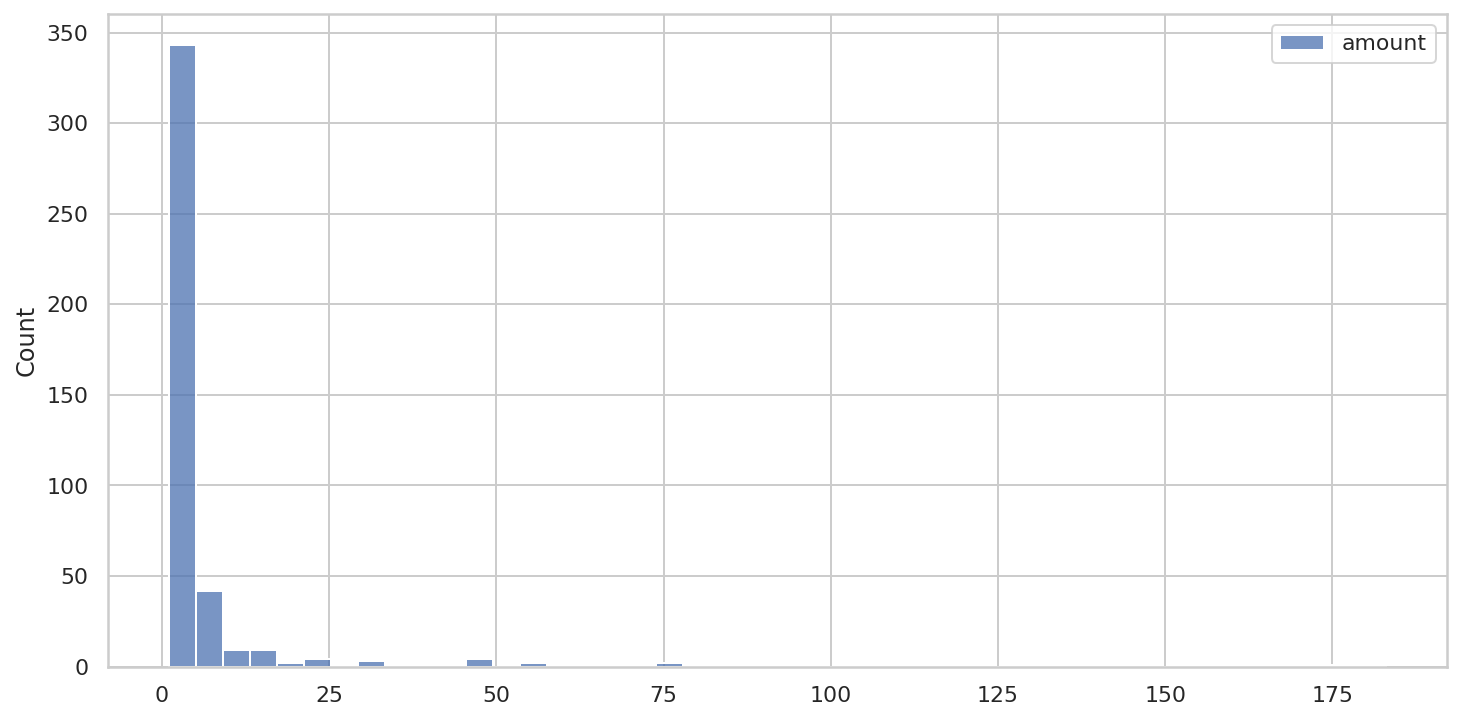

In [25]:
sns.histplot(df, bins=45)
plt.show()

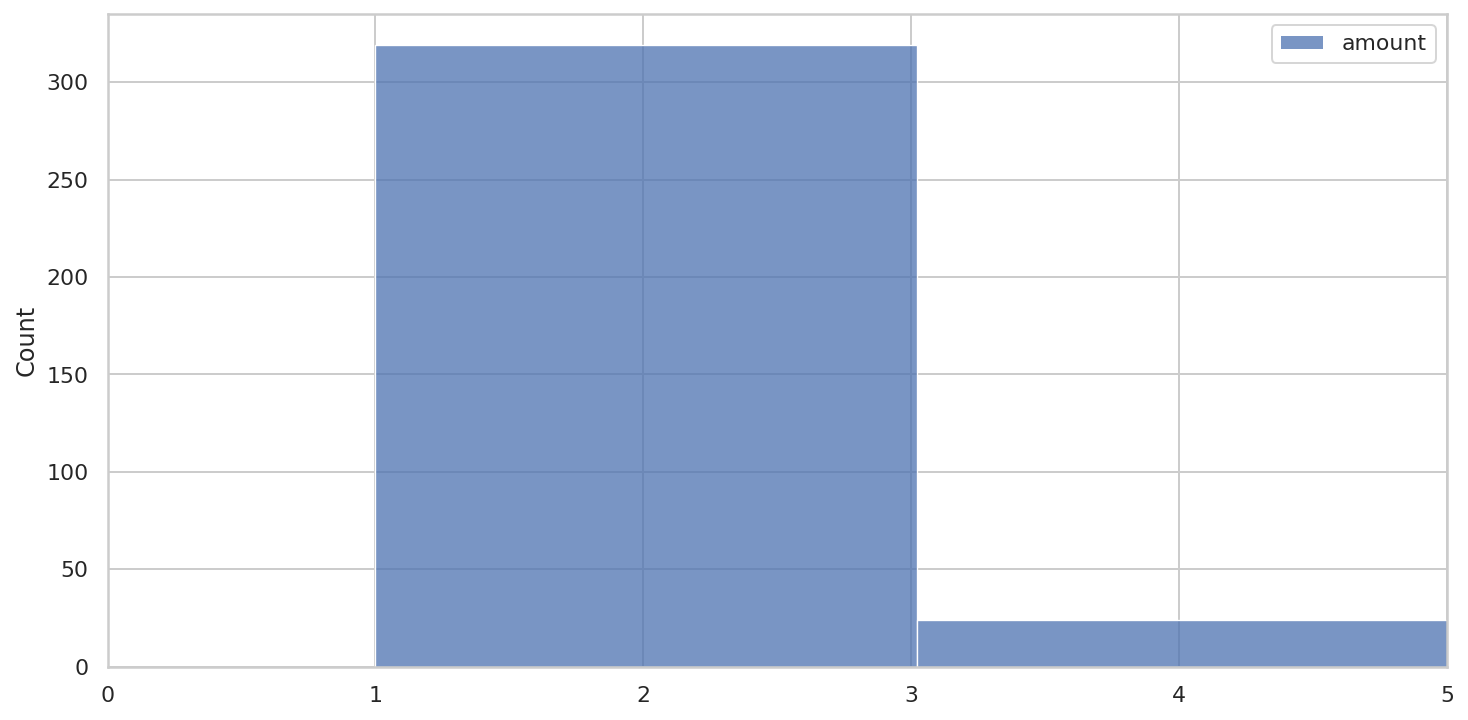

In [26]:
sns.histplot(df, bins=90)
plt.xlim(0, 5)
plt.show()

Достаточно много "сетей" у которых очень мало точек. Одна точка сомнительная сеть. Дополнительно в такие сети могли попасть нетипичные названия сетей которые мы не смогли преобразовать к общему виду. будем с осторожностью к ним относиться.

Для того чтобы понять как взаимосвязаны размер сети и количество посадочных мест разобьем сети на группы по количеству точек в сети. Сети у которых меньше 4 точек определим в отдельную группу.

In [27]:
def get_group(a):# объявим функцию для определения группы
    if a <= 3:
        return 'Прочее'
    if a <= 10:
        return 'Малая сеть'
    if a <= 50:
        return 'Средняя сеть'
    if a < 100:
        return 'Большая сеть'
    return 'Крупная сеть' 

In [28]:
df['chain_rank'] = df['amount'].apply(get_group)

In [29]:
df.head()

,chain_name,amount,chain_rank
0,шоколадница,183,Крупная сеть
1,kfc,175,Крупная сеть
2,макдоналдс,171,Крупная сеть
3,бургер кинг,151,Крупная сеть
4,теремок,108,Крупная сеть


Добавим к таблице с названием точки и количеством посадочных мест данные о названии сети и ее группе.

In [30]:
rest.query('chain == "да"').number.describe()

count   2968.00
mean      52.92
std       57.14
min        0.00
25%       15.00
50%       40.00
75%       72.00
max      580.00
Name: number, dtype: float64

In [31]:
rest_ch = rest_chain[['object_name', 'number']]
dfb = df[['chain_name','chain_rank']]
rest_df = rest_ch.merge(dfb, left_on='object_name', right_on='chain_name', how='left')
rest_df.head()

,object_name,number,chain_name,chain_rank
0,пиццетория,40,пиццетория,Прочее
1,брусника,10,брусника,Малая сеть
2,алло пицца,32,алло пицца,Средняя сеть
3,суши wok,7,суши wok,Большая сеть
4,тануки,160,тануки,Средняя сеть


Уберем точки с числом посадочных мест ноль. В данном случае интересны заведения с помещением и наличием мест.

In [32]:
rest_df.query('number == 0')['chain_rank'].value_counts()

Большая сеть    98
Средняя сеть    83
Крупная сеть    42
Прочее          26
Малая сеть      19
Name: chain_rank, dtype: int64

In [33]:
rest_df = rest_df.query('number != 0')

Построим график, 

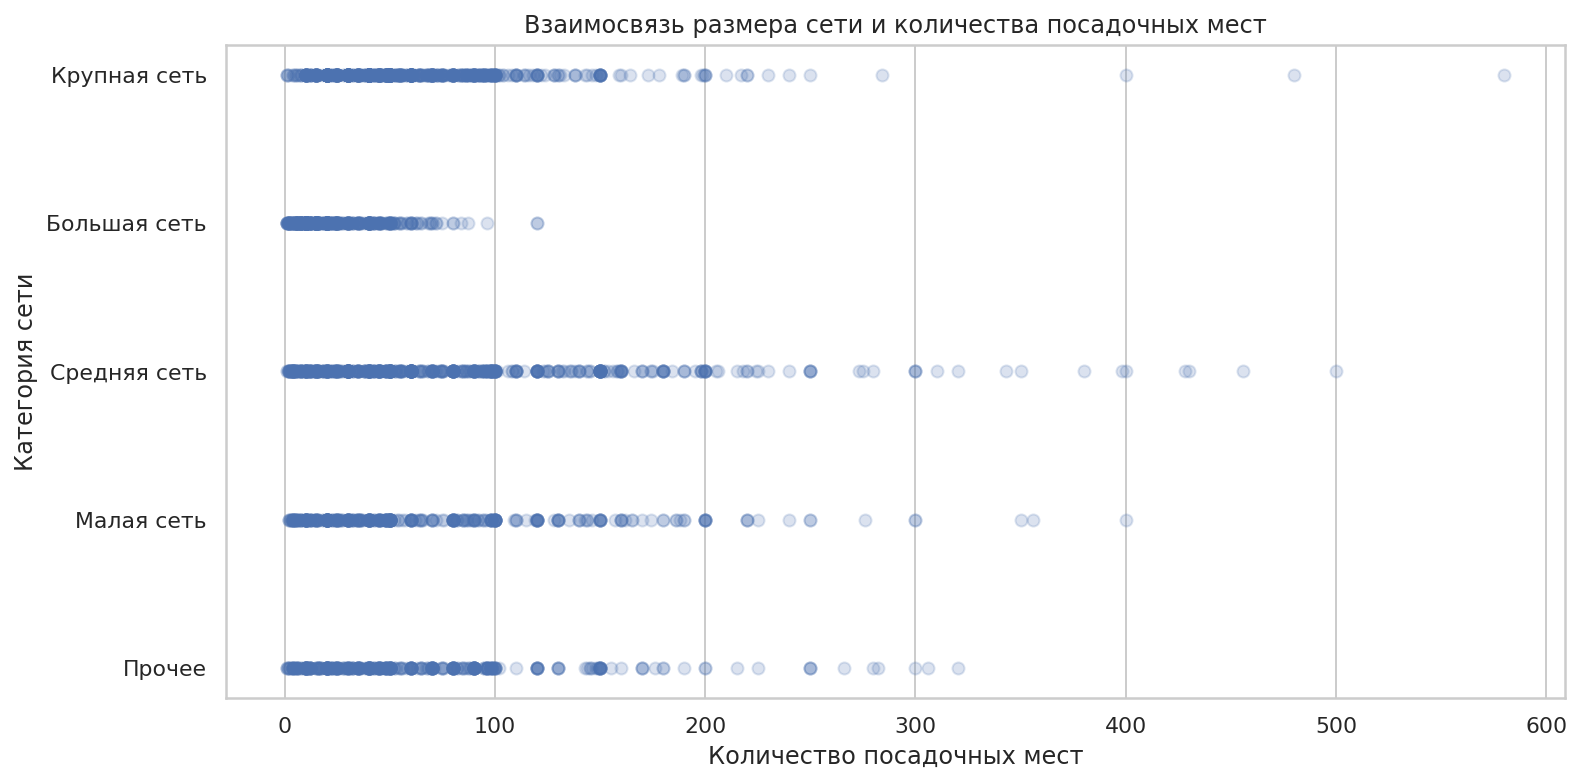

In [34]:
plt.plot('number', 'chain_rank', data=rest_df, linestyle='none', marker='o', alpha=0.2)
plt.grid(axis = 'y')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория сети')
plt.title('Взаимосвязь размера сети и количества посадочных мест')
plt.show()

Вглянем на распределение. Построим boxplot.

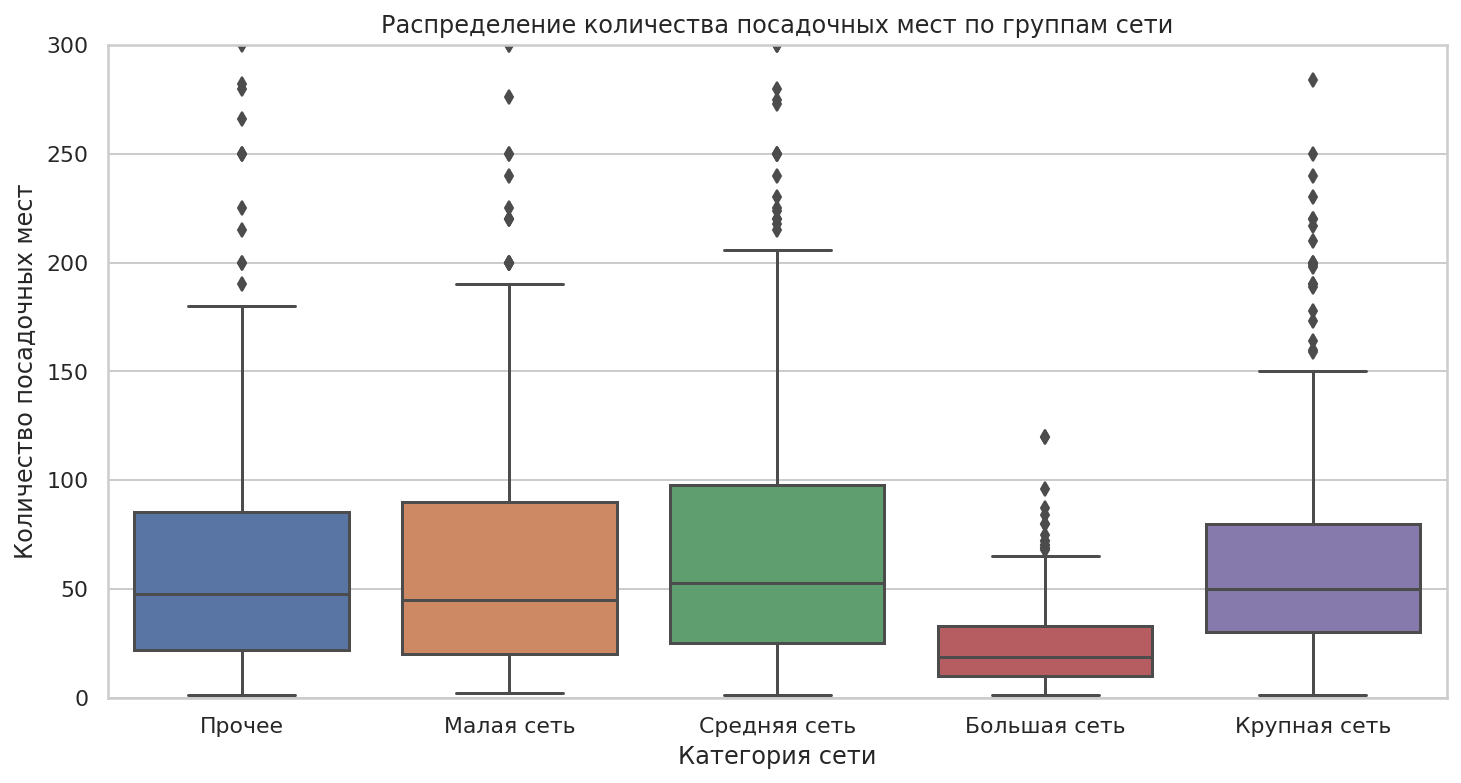

In [35]:
sns.boxplot( x=rest_df['chain_rank'], y=rest_df['number'])
plt.ylim(0, 300)
plt.ylabel('Количество посадочных мест')
plt.xlabel('Категория сети')
plt.title('Распределение количества посадочных мест по группам сети')
plt.show()

Посчитаем среднее количество посадочных мест по группам сети и построим график.

In [36]:
number_mean = rest_df.groupby('chain_rank', as_index=False).agg({'number': 'mean'})
number_mean

,chain_rank,number
0,Большая сеть,23.38
1,Крупная сеть,60.35
2,Малая сеть,64.67
3,Прочее,61.34
4,Средняя сеть,75.00


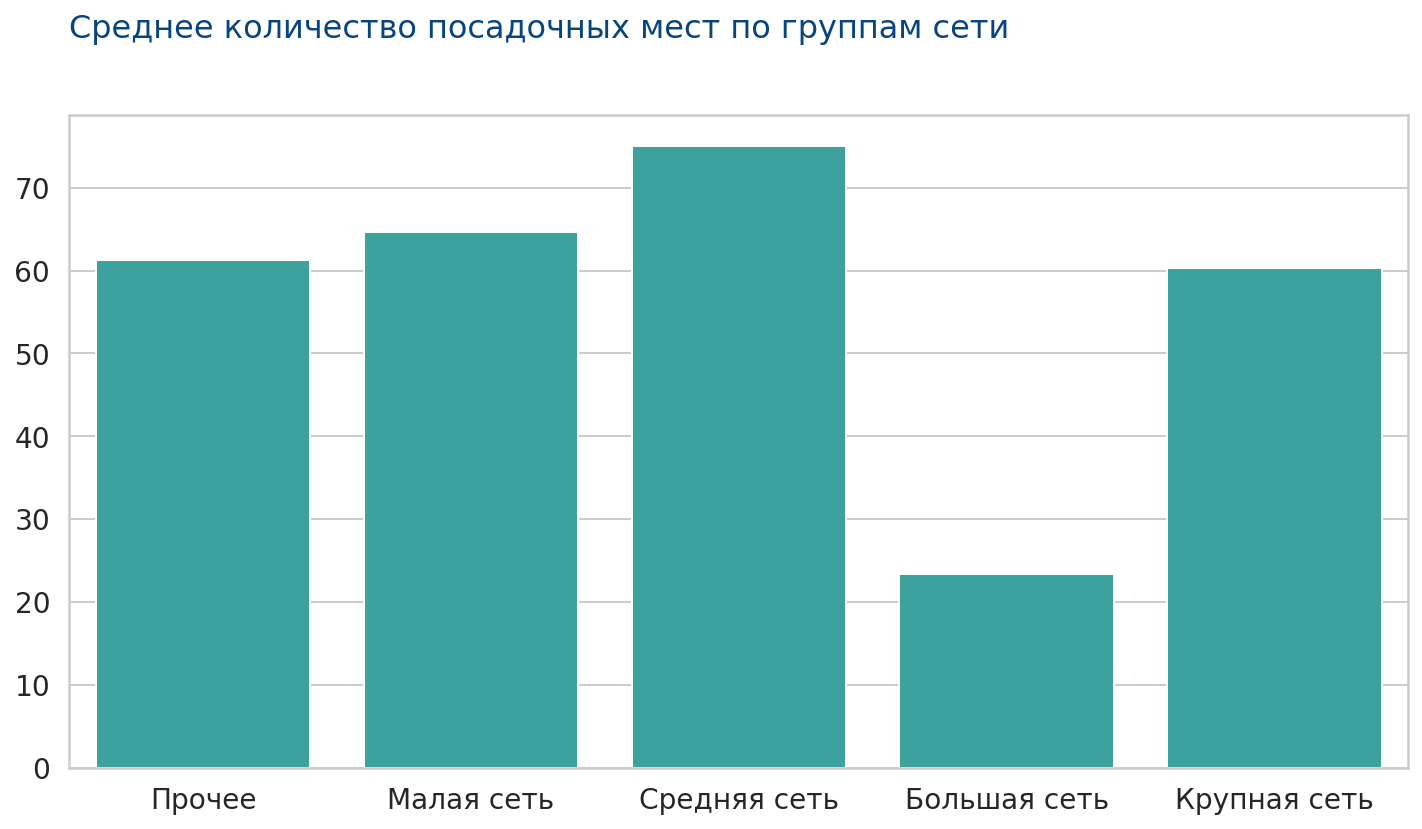

In [37]:
sns.barplot(x='chain_rank', y='number', data=number_mean, color='#2CB3AE',\
            order=['Прочее','Малая сеть','Средняя сеть','Большая сеть','Крупная сеть'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Среднее количество посадочных мест по группам сети', color="#08457E", fontsize=16, loc='left', y=1.1)
plt.show()

У малых сетей (3-10 точек) и средних сетей (10-50 точек) среднее количество посадочных мест выше чем у больших сетей (50-100 точек). И в то же время у самых крупных сетей (больше 100 точек) в среднем количество посадочных мест примерно столько же как и у малых сетей.

Около 60 посадочных мест это достаточно много для большинства сетевых заведений. Как и в целом для всех заведений.

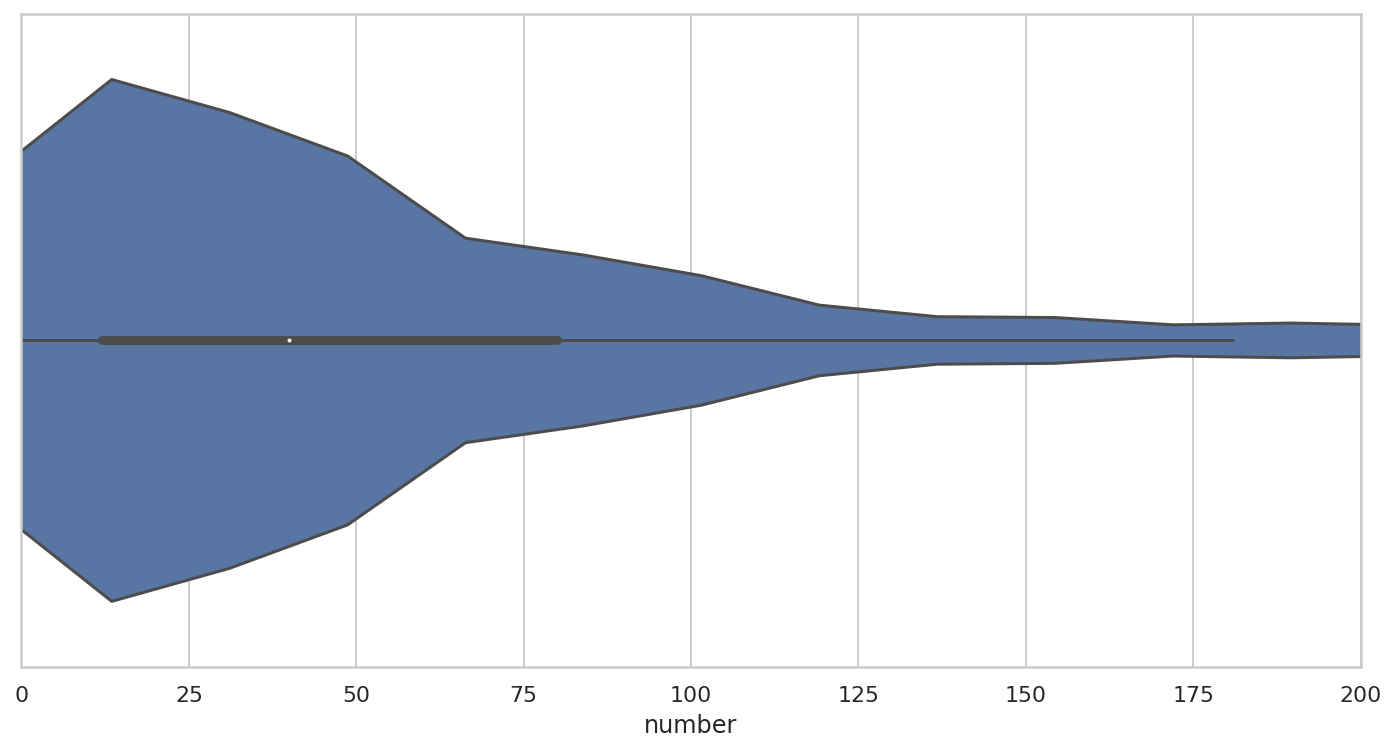

In [38]:
sns.violinplot(rest.number)
plt.xlim(0,200) ;

Для большинства сетевых заведений характерно мало заведений с большим количеством посадочных мест.

## Определим для каждого вида объекта общественного питания среднее количество посадочных мест.

Посчитаем для каждого вида заведений среднее число посадочных мест.

In [39]:
type_mean = rest.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index() \
.sort_values(by='number', ascending=False)
type_mean

,object_type,number
8,столовая,130.25
7,ресторан,96.83
1,буфет,51.13
0,бар,43.49
3,кафе,39.72
6,предприятие быстрого обслуживания,20.55
4,кафетерий,9.12
2,закусочная,7.61
5,магазин (отдел кулинарии),5.59


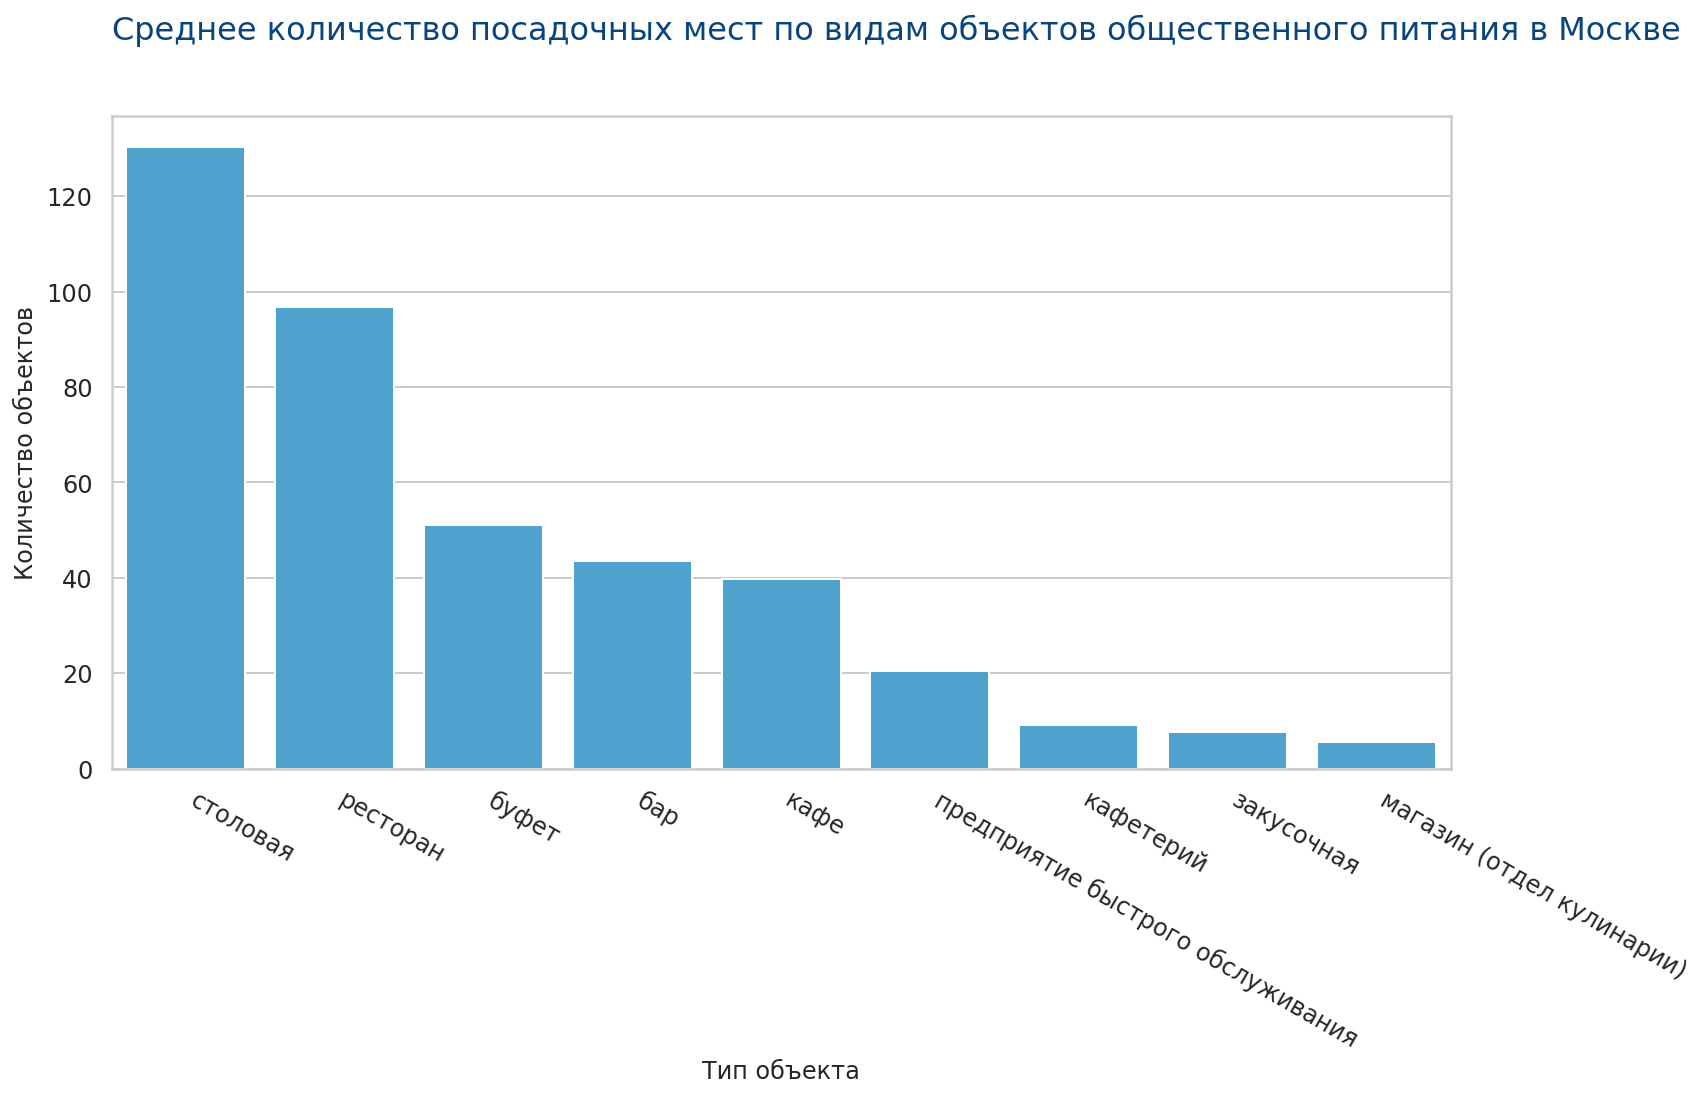

In [40]:
sns.barplot(x='object_type', y='number', data=type_mean, color="#3AA9E2")
plt.xlabel("Тип объекта")
plt.ylabel("Количество объектов")
plt.xticks(rotation=-30, horizontalalignment='left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Среднее количество посадочных мест по видам объектов общественного питания в Москве', color="#08457e", fontsize=16, loc='left', y=1.1);

Ожидаемо, что столовые и рестораны больше всего вмещают посетителей.

Посмотрим на среднее количество посадочных мест в разрезе сетевые\несетевые заведения.

In [41]:
type_mean_ch = rest.pivot_table(index=['object_type', 'chain'], values='number', aggfunc='mean').reset_index() \
.sort_values(by=['number','object_type'], ascending=False)
type_mean_ch.head()

,object_type,chain,number
17,столовая,нет,130.27
16,столовая,да,112.33
14,ресторан,да,100.23
15,ресторан,нет,95.77
0,бар,да,53.03


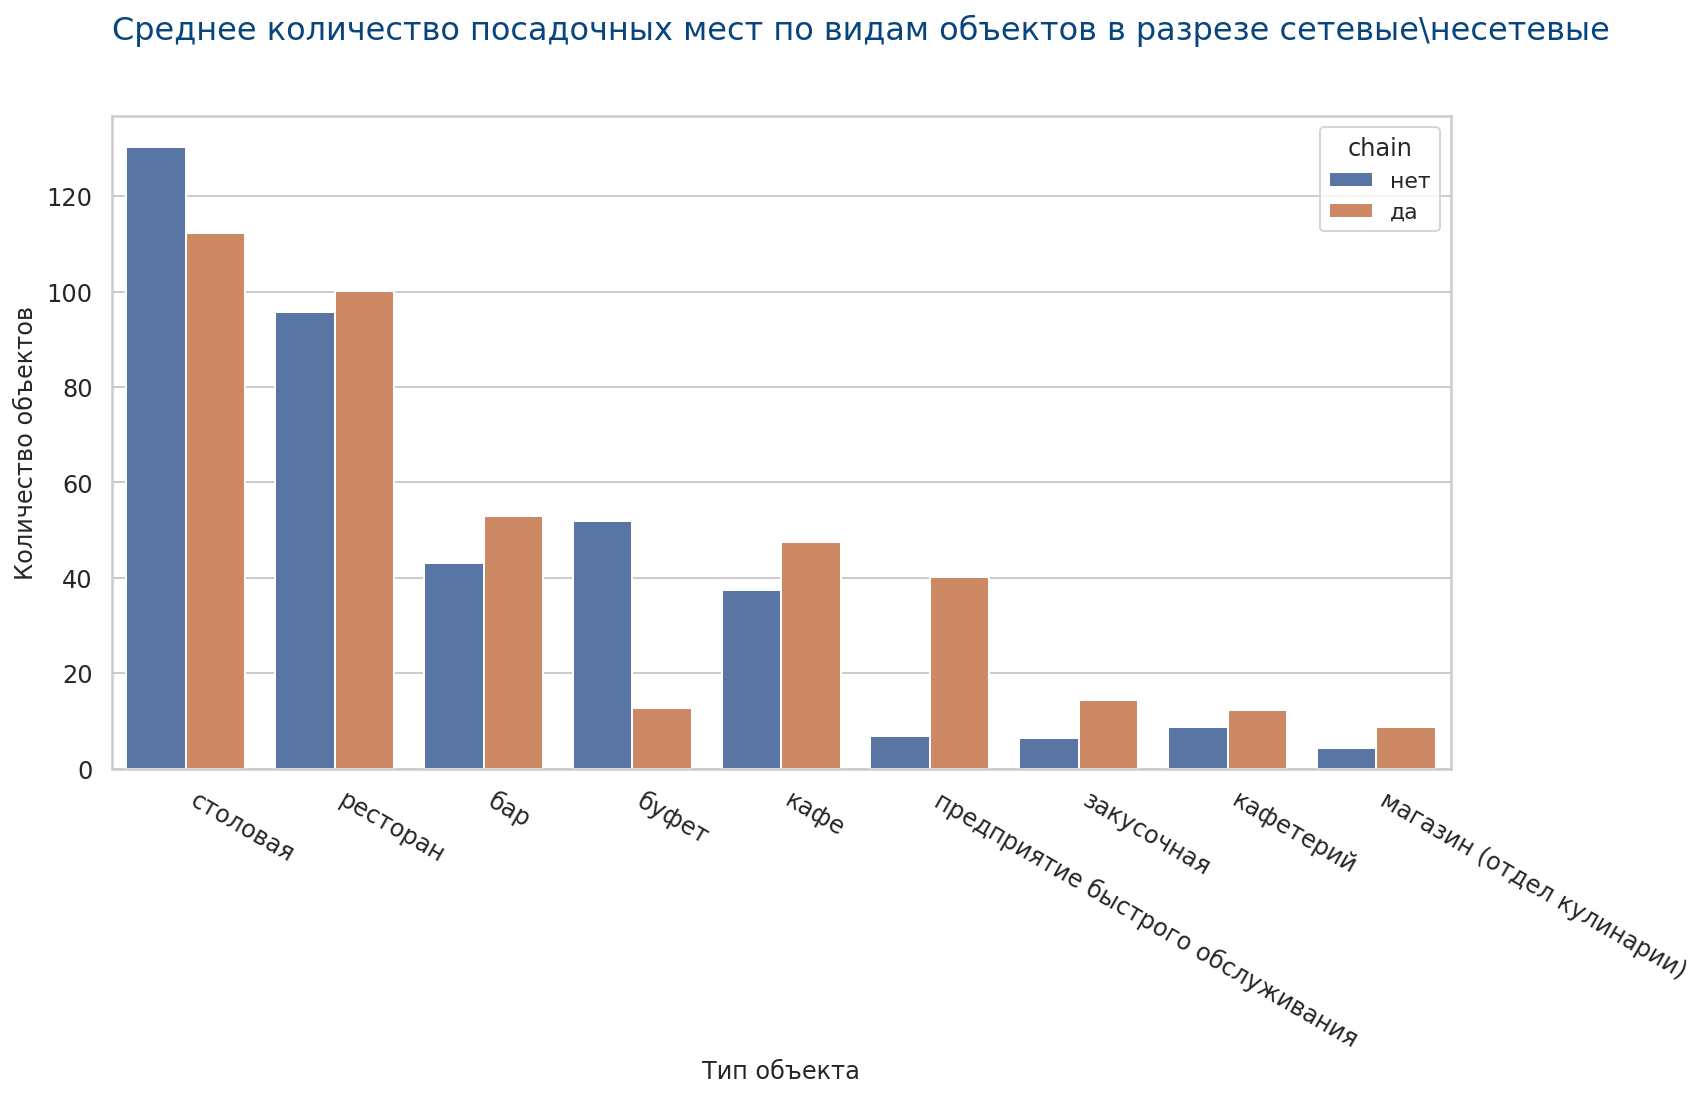

In [42]:
sns.barplot(x='object_type', y='number', hue='chain', data=type_mean_ch)
plt.xlabel("Тип объекта")
plt.ylabel("Количество объектов")
plt.xticks(rotation=-30, horizontalalignment='left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Среднее количество посадочных мест по видам объектов в разрезе сетевые\несетевые', color="#08457e", fontsize=16, loc='left', y=1.1);

Для популярных видов заведений (кафе, ресторан, ПБО) в случае если оно является сетевым - среднее число посадочных мест выше.

Посчитаем среднее число посадочных мест сетевых\несетевых заведений.

In [43]:
print('Среднее число посадочных мест:')
print('несетевых заведений - {:.0f}'.format(rest.query('chain == "нет"')['number'].mean()))
print('сетевых заведений - {:.0f}'.format(rest.query('chain == "да"')['number'].mean()))
print('сетевых заведений, предоставляющих место - {:.0f}'.format(rest.query('chain == "да" & number != 0')['number'].mean()))
print('всех заведений -', f"{rest['number'].mean():.0f}")

Среднее число посадочных мест:
несетевых заведений - 61
сетевых заведений - 53
сетевых заведений, предоставляющих место - 58
всех заведений - 60


## Определим топ-10 улиц по количеству объектов общественного питания.

### Сначала выделим в отдельный столбец информацию об улице из столбца address  
Для этого напишем короткую функцию. По результатам анализа столбца с адресами выяснилось что улица в большинстве случаев указана после названия города - между первой и второй запятой в строке адреса. Часть адресов начинается не с "город Москва" для них добавим условие.

In [44]:
def cut_substring(t):
    if 'город Москва' in t:
        return t[t.find(',')+2:t.find(',',t.find(',')+1)]
    else:
        return t[0:t.find(',')]

In [45]:
rest['street'] = rest['address'].apply(cut_substring)

In [46]:
rest[['address', 'street']].head(15)

,address,street
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица
5,"город Москва, Абрамцевская улица, дом 15, корпус 1",Абрамцевская улица
6,"город Москва, переулок Сивцев Вражек, дом 6/2",переулок Сивцев Вражек
7,"город Москва, Авиамоторная улица, дом 8, строение 1",Авиамоторная улица
8,"город Москва, Авиамоторная улица, дом 8, строение 1",Авиамоторная улица
9,"город Москва, Авиамоторная улица, дом 8, строение 1",Авиамоторная улица


Теперь для каждого заведения определена улица.

In [47]:
rest['street'].value_counts()

город Зеленоград           232
проспект Мира              204
Профсоюзная улица          183
Ленинградский проспект     173
Пресненская набережная     167
                          ... 
улица Капотня                1
2-я улица Марьиной Рощи      1
Нововладыкинский проезд      1
улица Богданова              1
улица Медведева              1
Name: street, Length: 1854, dtype: int64

### Найдем топ 10 улиц по количеству заведений.  
предварительно уберем поселения и города в составе Москвы.

In [48]:
waste= ['город Зеленоград', 'поселение Сосенское']
top_streets = rest.query('street not in @waste').groupby(by='street')['id'].count().reset_index() \
                .sort_values(by='id', ascending=False).head(10)
top_streets

,street,id
1404,проспект Мира,204
996,Профсоюзная улица,183
683,Ленинградский проспект,173
981,Пресненская набережная,167
406,Варшавское шоссе,162
686,Ленинский проспект,148
1401,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112
605,Кировоградская улица,110


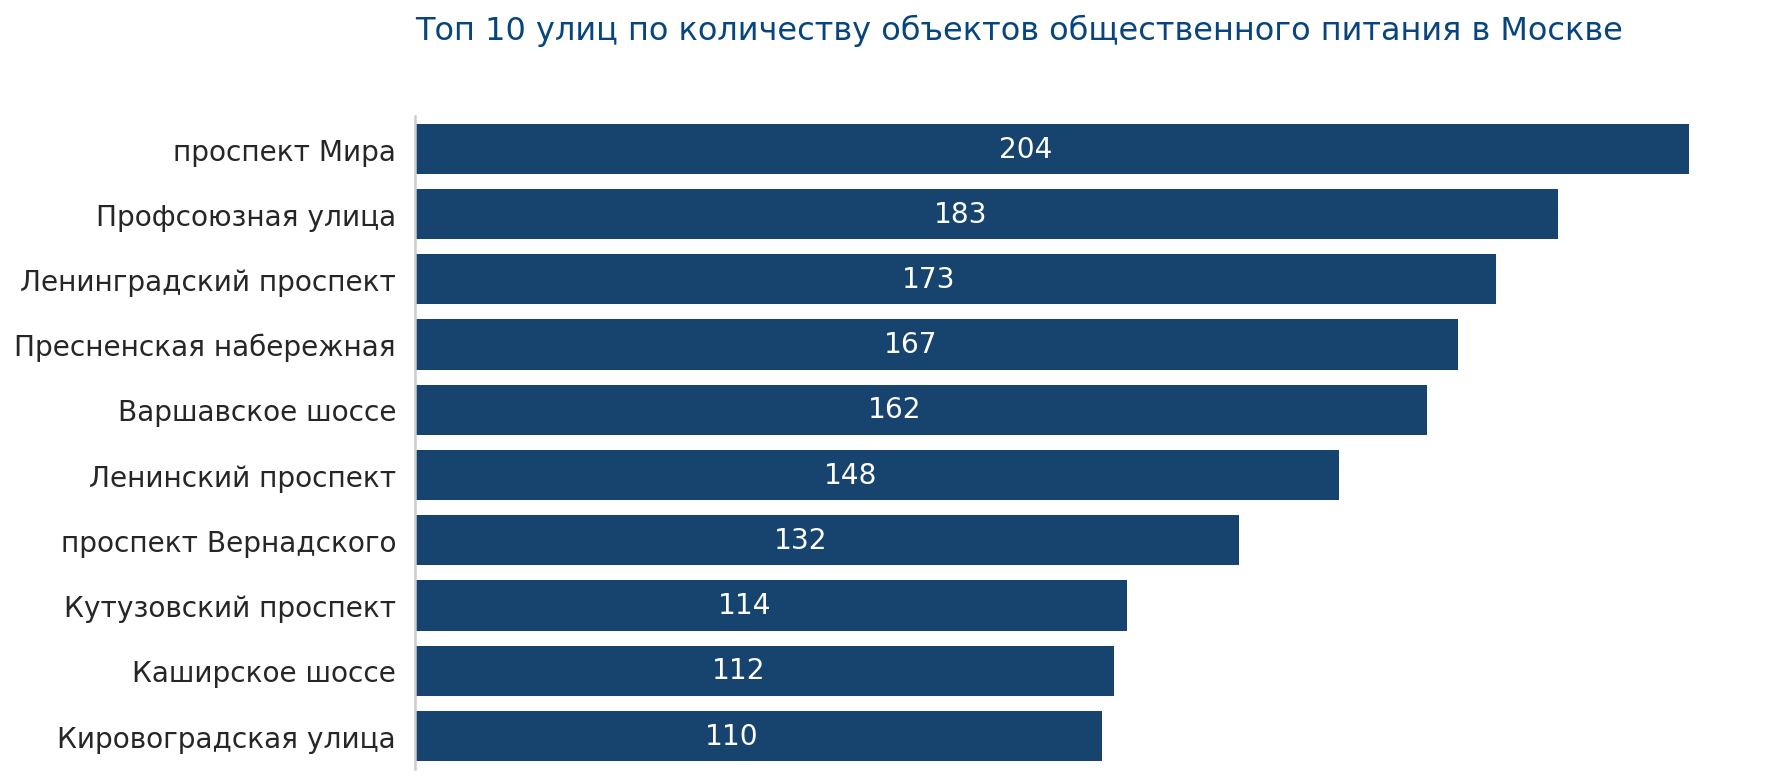

In [49]:
sns.barplot(x='id', y='street', data=top_streets, color="#08457e")
#plt.bar_label(hbars.containers[0], fontsize=14, color='white',label_type='center')
sns.despine(bottom=True)
for x,y in zip(top_streets['id'],range(10)):
    plt.text(x-0.5*x, y, x , fontsize=14, color='white', ha='right', va='center')

plt.xticks([])
plt.yticks(fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Топ 10 улиц по количеству объектов общественного питания в Москве', \
          color="#08457e", fontsize=16, loc='left', y=1.1);

Одни из самых протяженных улиц Москвы вмещают больше заведений. Исключение из этого правило Пресненская набережная.

### Посмотрим в каких районах Москвы находятся топ 10 улиц по количеству заведений.

Импортируем внешний файл, содержащий соответствие улиц и районов Москвы.

In [50]:
street_dist = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1zDooZObtcwNze2ugBP3gPrFb_4miZHHx',\
                          sep=',')

In [51]:
street_dist.head()

,streetname,okrug,area
0,Выставочный переулок,ЦАО,Пресненский
1,улица Гашека,ЦАО,Пресненский
2,Большая Никитская улица,ЦАО,Пресненский
3,Глубокий переулок,ЦАО,Пресненский
4,Большой Гнездниковский переулок,ЦАО,Пресненский


In [52]:
street_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4263 non-null   object
 1   okrug       4263 non-null   object
 2   area        4263 non-null   object
dtypes: object(3)
memory usage: 100.0+ KB


Посмотрим к каким районам относятся интересующие нас улицы.

In [53]:
ts = top_streets['street']
sreet_area = street_dist.query('streetname in @ts')[['streetname', 'area']].sort_values(by=['streetname', 'area'])
sreet_area.head()

,streetname,area
3136,Варшавское шоссе,Донской
3200,Варшавское шоссе,Нагатино-Садовники
3244,Варшавское шоссе,Нагорный
3871,Варшавское шоссе,Северное Бутово
3013,Варшавское шоссе,Чертаново Северное


Посмотрим для всех ли 10 улиц нашлись районы:

In [54]:
sreet_area.streetname.value_counts()

Ленинский проспект        8
Варшавское шоссе          8
проспект Мира             7
Профсоюзная улица         6
проспект Вернадского      5
Ленинградский проспект    4
Каширское шоссе           4
Кировоградская улица      3
Кутузовский проспект      2
Пресненская набережная    1
Name: streetname, dtype: int64

Для всех 10 улиц определены районы.

In [55]:
sreet_area['area'].unique()

array(['Донской', 'Нагатино-Садовники', 'Нагорный', 'Северное Бутово',
       'Чертаново Северное', 'Чертаново Центральное', 'Чертаново Южное',
       'Южное Бутово', 'Москворечье-Сабурово',
       'Орехово-Борисово Северное', 'Орехово-Борисово Южное',
       'Дорогомилово', 'Фили-Давыдково', 'Аэропорт', 'Беговой', 'Сокол',
       'Хорошевский', 'Гагаринский', 'Ломоносовский', 'Обручевский',
       'Проспект Вернадского', 'Теплый Стан', 'Тропарево-Никулино',
       'Якиманка', 'Пресненский', 'Академический', 'Коньково',
       'Черемушки', 'Ясенево', 'Раменки', 'Алексеевский', 'Марьина роща',
       'Мещанский', 'Останкинский', 'Ростокино', 'Свиблово',
       'Ярославский Район'], dtype=object)

Расположение улиц на карте можно увидеть в презентации.

## Найдем число улиц с одним объектом общественного питания. Определим в каких районах Москвы находятся эти улицы.

Посчитаем для каждой улицы количество заведений, находящихся на ней.

In [56]:
street_one = rest.groupby(by='street')['id'].count().reset_index().sort_values(by='id')
street_one.head()

,street,id
758,Малый Татарский переулок,1
743,Малый Знаменский переулок,1
744,Малый Ивановский переулок,1
745,Малый Казённый переулок,1
746,Малый Каретный переулок,1


Соберем все улицы с одним заведением в список.

In [57]:
so = street_one[street_one['id'] == 1]['street']
so.head()

758     Малый Татарский переулок
743    Малый Знаменский переулок
744    Малый Ивановский переулок
745      Малый Казённый переулок
746      Малый Каретный переулок
Name: street, dtype: object

Теперь мы можем вывести все районы, в которых находятся все эти улицы.

In [58]:
sreet_one_area = street_dist.query('streetname in @so')[['streetname', 'area']].sort_values(by=['streetname', 'area'])
sreet_one_area['area'].unique()

array(['Аэропорт', 'Басманный', 'Красносельский', 'Свиблово', 'Рязанский',
       'Якиманка', 'Хамовники', 'Соколиная Гора', 'Даниловский',
       'Мещанский', 'Таганский', 'Лефортово', 'Печатники', 'Сокольники',
       'Замоскворечье', 'Хорошевский', 'Арбат', 'Алексеевский',
       'Текстильщики', 'Ростокино', 'Раменки', 'Хорошево-Мневники',
       'Покровское-Стрешнево', 'Марьина роща', 'Богородское',
       'Нижегородский', 'Тверской', 'Лосиноостровский', 'Преображенское',
       'Ново-Переделкино', 'Восточное Измайлово', 'Измайлово',
       'Северное Измайлово', 'Беговой', 'Донской', 'Гольяново',
       'Войковский Район', 'Савеловский', 'Филевский Парк', 'Перово',
       'Чертаново Южное', 'Южнопортовый Район', 'Головинский',
       'Южное Бутово', 'Останкинский', 'Сокол', 'Северный', 'Кунцево',
       'Люблино', 'Тимирязевский Район', 'Внуково',
       'Бескудниковский Район', 'Зюзино', 'Пресненский', 'Солнцево',
       'Дмитровский', 'Метрогородок', 'Митино', 'Нагатино-Садовники

Очень большой список. Почти в каждом районе есть такое заведение. Переулков, проездов и маленьких улиц достаточно много поэтому улицы с одним заведением распространены везде.  
Расположение этих заведений и улиц на карте, также, увидим в презентации. 

In [59]:
print('Изначальное количество улиц', len(so.unique()))
print('Количество улиц, для которых нашелся район', len(sreet_one_area.streetname.unique()))

Изначальное количество улиц 541
Количество улиц, для которых нашелся район 518


Не нашлось района для 23 улиц, это порядка 4% от улиц, которые нам нужно было найти. В данном случае считаю что, это не повлияет на вывод. Распространение улиц с одним объектом и без этих улиц достаточно большое.

## Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

Построим график boxplot, и посмотрим на рапределение посадочных мест на каждой улице с большим количеством заведений.

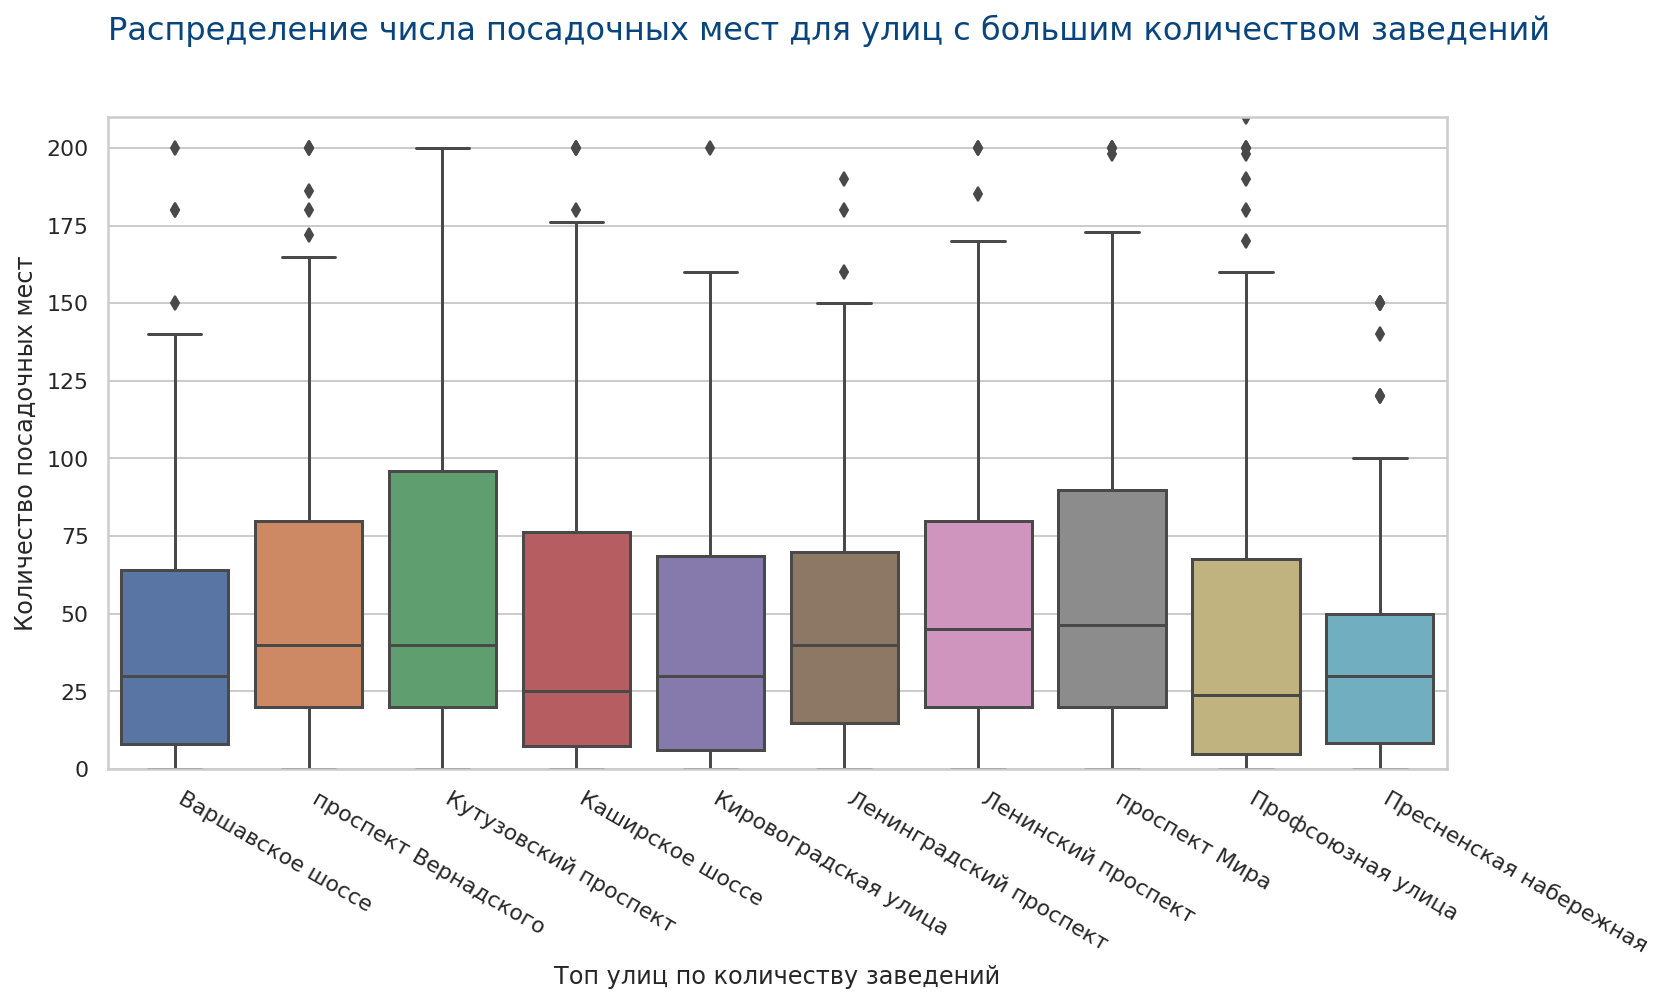

In [60]:
sns.boxplot( x='street', y='number', data=rest.query('street in @ts'))
plt.ylim(0, 210)
plt.ylabel('Количество посадочных мест')
plt.xlabel('Топ улиц по количеству заведений')
plt.xticks(rotation=-30, horizontalalignment='left')
plt.title('Распределение числа посадочных мест для улиц с большим количеством заведений',\
          color="#08457e", fontsize=16, loc='left', y=1.1)
plt.show()

Кутузовский проспект, проспект Мира и Пресненская набережная немного выделяются по количеству заведений, но по остальным улицам распределение примерно одинаково. А теперь посмотрим на распределение по всем улицам вместе.

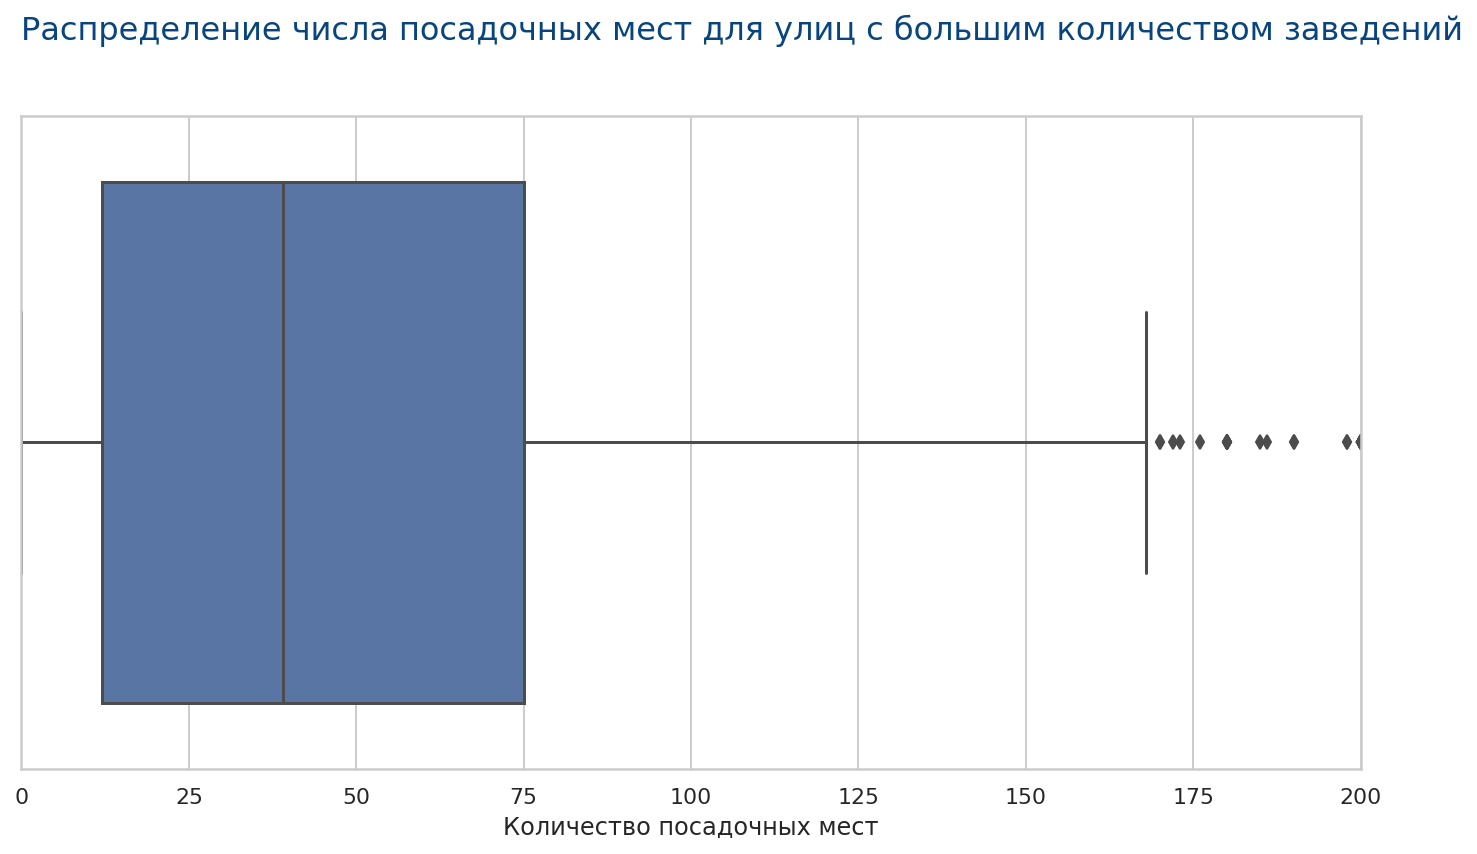

In [61]:
street_top = rest.query('street in @ts')
sns.boxplot( x=street_top['number'])
plt.xlabel('Количество посадочных мест')
plt.xlim(0, 200)
plt.title('Распределение числа посадочных мест для улиц с большим количеством заведений',\
          color="#08457e", fontsize=16, loc='left', y=1.1)
plt.show()

Получается 75% таких заведений имеют до 75 посадочных мест.  
Можно построить гисторгамму, чтобы увидеть заведений какой вместительностью больше всего на этих улицах.

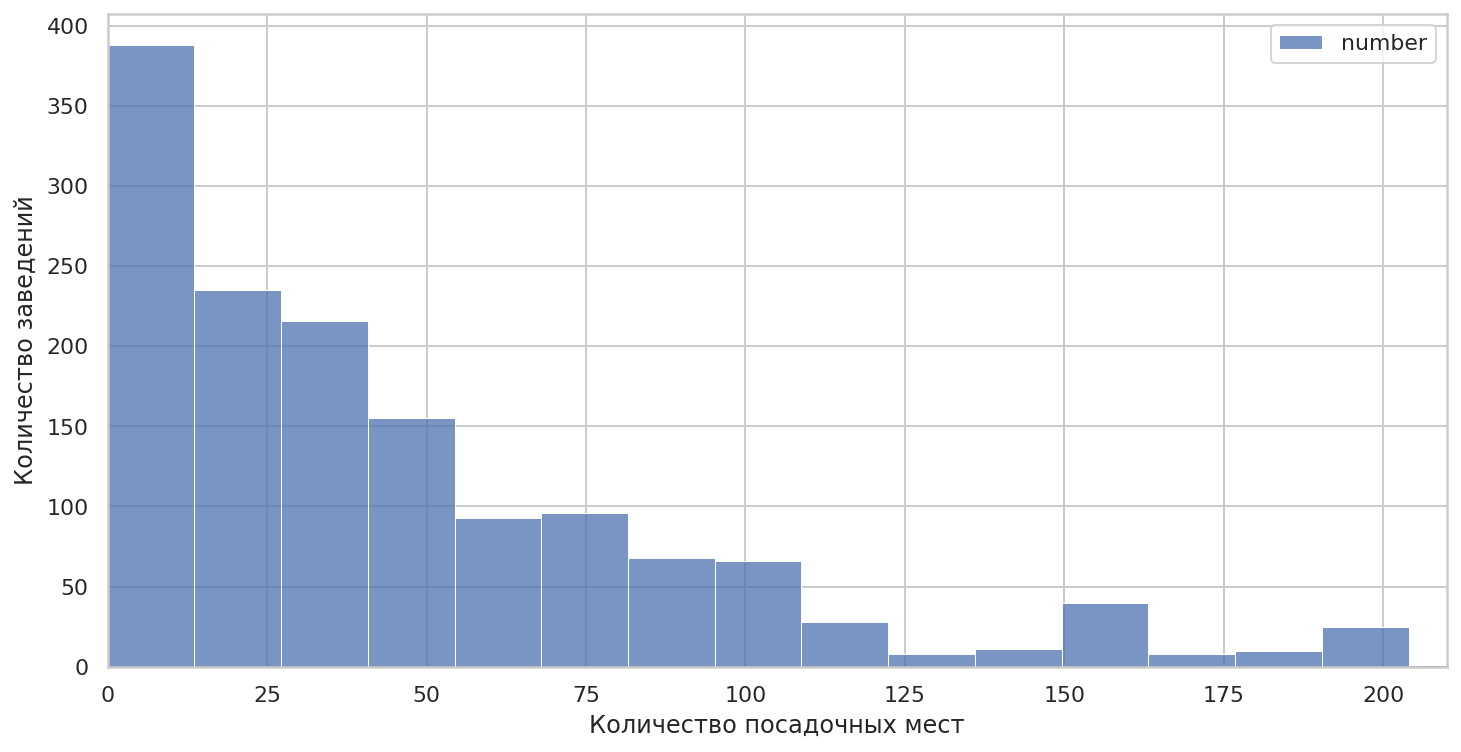

In [62]:
sns.histplot(rest.query('street in @ts')[['number']], bins=125)
plt.xlim(0, 210)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

Больше всего заведений с вместительностью до 15 человек.

In [63]:
print('Среднее число посадочных мест на улицах с большим количеством заведений:', f"{rest.query('street in @ts')['number'].mean():.0f}")

Среднее число посадочных мест на улицах с большим количеством заведений: 58


Среднее число для улиц с большим кол-вом заведений кардинально не отличается от среднего по всем заведениям.

# Вывод, Презентация

Презентация: <https://drive.google.com/file/d/1b7zV9Q3JcV7Bgwsn41_rPI3aM14MQJ8h/view?usp=sharing>

Самые популярный формат заведений в Москве - это Кафе. Также пользуются спросом Рестораны, Предприятия быстрого обслуживания, Столовые.
При выборе расположения заведения в Москве можно ориентироваться на Топ 10 улиц по числу заведений, если мы не боимся конкуренции. Улицы с одним заведением в большинстве случаев сосредоточены в центре Москвы, как правило это маленькие переулки и проезды.
Для большинства заведений как сетевых так и не сетевых среднее число посадочных мест - 60. Среднее кафе вмещает 40 человек. Средний ресторан почти 100 человек.

Для большинства сетевых заведений характерно мало заведений с большим количеством посадочных мест. 

На основании исследуемых данных можно обозначить следующие рекомендации:

- Ориентироваться на самый популярный формат заведений в городе, а именно - Кафе;

- Кафе должно вмещать  от 35 до 45 посетителей;

- Если мы не боимся конкуренции, то кафе рекомендуется расположить на одной из топ 10 улиц по числу заведений или в центральном районе.

Рынок сетевых заведений достаточно насыщен. Конкуренция в популярных районах с высокой проходимостью достаточно высокая и чтобы выделяться на фоне остальных кафе, необходимо обладать  определенными преимуществами или быть оригинальным, например, использовать в обслуживании гостей роботов.